In [1]:
from getpass import getpass
import requests
import pandas as pd
import math
from IPython.display import display, Markdown

MAILCHIMP_API_KEY = getpass("MAILCHIMP_API_KEY")

dc = MAILCHIMP_API_KEY.split("-")[1]

MAILCHIMP_API_URL = f"https://{dc}.api.mailchimp.com/3.0/lists/a7bb2bbc4f/members"

MAILCHIMP_API_KEY ········


In [6]:
unsubscribers = requests.get(
    MAILCHIMP_API_URL,
    params={
        "apikey": MAILCHIMP_API_KEY,
        "status": "unsubscribed",
        "fields": "total_items",
    },
)
total_unsubscribers = unsubscribers.json()["total_items"]

display(Markdown(f"### Anzahl der Newsletter-Unsubscriptions: {total_unsubscribers}"))

### Anzahl der Newsletter-Unsubscriptions: 3666

In [7]:
unsubscribers = []


for i in range(math.ceil(total_unsubscribers / 1000)):
    unsubscribers.extend(
        requests.get(
            MAILCHIMP_API_URL,
            params={
                "apikey": MAILCHIMP_API_KEY,
                "status": "unsubscribed",
                "offset": (i * 1000),
                "count": 1000,
            },
        ).json()["members"]
    )

In [10]:
### Test
import matplotlib.pyplot as plt

reasons = [unsub["unsubscribe_reason"] for unsub in unsubscribers]
df=pd.DataFrame(reasons)
df[0].value_counts()

0
N/A (Unsubscribed by admin)                                                                                                                                                                                                                                        2134
None given                                                                                                                                                                                                                                                          601
No longer interested                                                                                                                                                                                                                                                597
Did not signup for list                                                                                                                                                                                       

In [11]:
registered_with = [unsub["source"] for unsub in unsubscribers]
df=pd.DataFrame(registered_with)
df[0].value_counts()

0
Unknown               2559
Admin Add              326
Import                 298
Hosted Signup Form     208
API - Generic          136
Popup Form             119
Zapier                  18
                         2
Name: count, dtype: int64

In [19]:
### Test

subscribers = requests.get(
    MAILCHIMP_API_URL,
    params={
        "apikey": MAILCHIMP_API_KEY,
        "status": "subscribed",
        "fields": "total_items",
    },
)
total_subscribers = subscribers.json()["total_items"]

display(Markdown(f"### Anzahl der Newsletter-Subscriptions: {total_subscribers}"))

### Anzahl der Newsletter-Subscriptions: 8194

In [ ]:
success =  requests.delete

In [20]:
### weiter Test

subscribers = []

###day_before_last_sent_newsletter_email = "2022-12-21T00:00:00+00:00"

for i in range(math.ceil(total_subscribers / 1000)):
    subscribers.extend(
        requests.get(
            MAILCHIMP_API_URL,
            params={
                "apikey": MAILCHIMP_API_KEY,
                "status": "subscribed",
                "offset": (i * 1000),
                "count": 1000,
            },
        ).json()["members"]
    )

In [21]:
registered_with = [sub["source"] for sub in subscribers]
df=pd.DataFrame(registered_with)
df[0].value_counts()

0
API - Generic           3665
Popup Form              1562
Unknown                 1320
Hosted Signup Form       801
Admin Add                409
Import                   407
Zapier                    28
Facebook Signup Form       2
Name: count, dtype: int64

In [22]:
registered_on = [pd.Timestamp(sub["timestamp_signup"]) for sub in subscribers]
df=pd.DataFrame(registered_on)
registered_on_date = [pd.Timestamp(sub["timestamp_signup"]).date() for sub in subscribers]
df_date = pd.DataFrame(registered_on_date)
df_date[0].value_counts()

0
2020-03-24    25
2020-03-26    20
2020-04-21    19
2020-03-31    18
2020-04-01    17
              ..
2018-08-19     1
2018-08-18     1
2018-08-17     1
2018-08-12     1
2023-10-11     1
Name: count, Length: 1884, dtype: int64

<Axes: xlabel='0,0'>

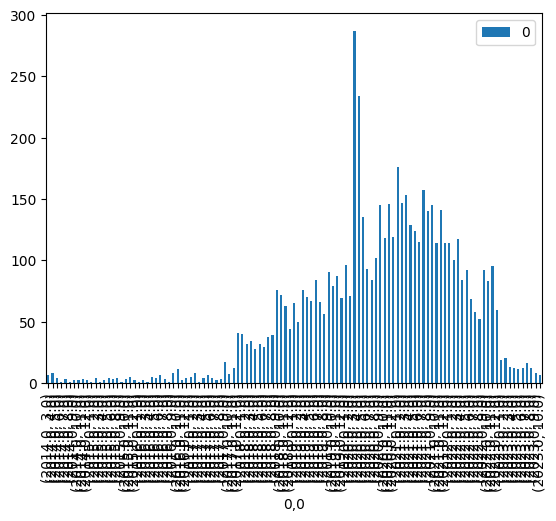

In [23]:
#df[0] = df[0].tz_convert('UTC').astype("datetime64")
df.groupby([df[0].dt.year, df[0].dt.month]).count().plot(kind="bar")
#df[0].plot.hist(bins = 20000)

In [24]:
### Test

members = requests.get(
    MAILCHIMP_API_URL,
    params={
        "apikey": MAILCHIMP_API_KEY,
        "fields": "total_items",
    },
)
total_members = members.json()["total_items"]

display(Markdown(f"### Anzahl der Newsletter-Members: {total_members}"))

### Anzahl der Newsletter-Members: 13246

In [106]:
### weiter Test

members = []

###day_before_last_sent_newsletter_email = "2022-12-21T00:00:00+00:00"

for i in range(math.ceil(total_members / 1000)):
    members.extend(
        requests.get(
            MAILCHIMP_API_URL,
            params={
                "apikey": MAILCHIMP_API_KEY,
                "offset": (i * 1000),
                "count": 1000,
            },
        ).json()["members"]
    )

In [51]:
data = [{"status": sub["status"], "date": pd.to_datetime(sub["timestamp_signup"], errors = 'coerce')} for sub in members]
df=pd.DataFrame(data)
df = df.dropna(subset=['date'])
df[0:].value_counts()

status        date                     
cleaned       2020-10-06 06:56:03+00:00    2
              2014-01-31 21:05:13+00:00    1
subscribed    2021-08-06 08:11:20+00:00    1
              2021-08-09 08:17:15+00:00    1
              2021-08-08 06:08:44+00:00    1
                                          ..
              2020-03-29 11:12:39+00:00    1
              2020-03-29 09:03:36+00:00    1
              2020-03-29 06:25:48+00:00    1
              2020-03-28 22:07:05+00:00    1
unsubscribed  2022-12-05 15:34:13+00:00    1
Name: count, Length: 6714, dtype: int64

In [52]:
registered_on = [pd.Timestamp(sub["timestamp_signup"]) for sub in members]
df=pd.DataFrame(registered_on)
registered_on_date = [pd.Timestamp(sub["timestamp_signup"]).date() for sub in members]
df_date = pd.DataFrame(registered_on_date)
df_date[0].value_counts()

0
2020-03-24    25
2020-03-26    20
2020-03-31    19
2020-04-21    19
2019-06-23    18
              ..
2018-09-29     1
2018-10-01     1
2018-10-03     1
2018-11-16     1
2023-10-11     1
Name: count, Length: 2050, dtype: int64

<Axes: xlabel='0,0'>

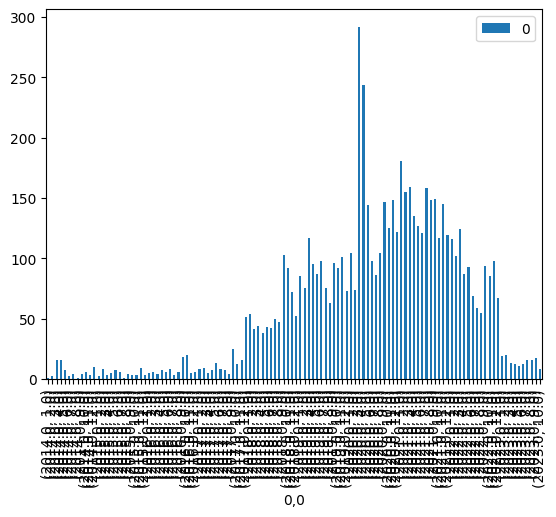

In [32]:
df.groupby([df[0].dt.year, df[0].dt.month]).count().plot(kind="bar")

In [140]:
data = [{"source": sub["source"], "date": pd.to_datetime(sub["timestamp_signup"], errors = 'coerce')} for sub in members]
df=pd.DataFrame(data)
#df = df.dropna(subset=['date'])
df[0:].value_counts()

source              date                     
Popup Form          2020-10-06 06:56:03+00:00    2
                    2017-05-26 09:29:54+00:00    1
Hosted Signup Form  2019-03-30 10:49:40+00:00    1
                    2019-05-13 20:49:43+00:00    1
                    2019-05-13 11:36:08+00:00    1
                                                ..
API - Generic       2021-06-04 14:44:06+00:00    1
                    2021-06-04 10:07:33+00:00    1
                    2021-06-03 18:03:39+00:00    1
                    2021-06-03 17:34:55+00:00    1
Zapier              2017-05-26 09:18:21+00:00    1
Name: count, Length: 6714, dtype: int64

In [141]:
api = df[df["source"]=="API - Generic"]
popup = df[df["source"]=="Popup Form"]
hosted = df[df["source"]=="Hosted Signup Form"]
admin = df[df["source"]=="Admin Add"]
imported = df[df["source"]=="Import"]
unknown = df[df["source"]=="Unknown"]

<Axes: xlabel='date,date'>

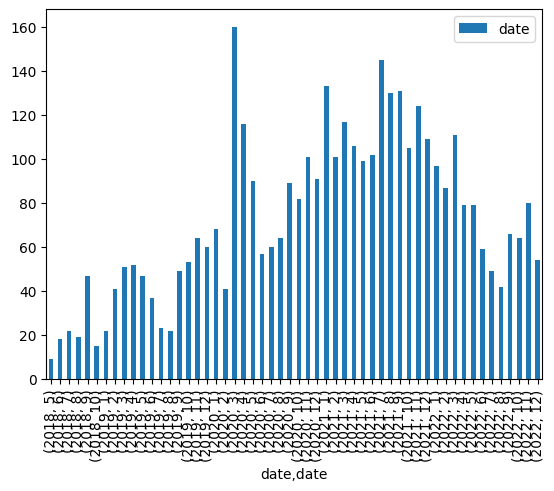

In [112]:
api.drop(columns=["source"]).groupby([api["date"].dt.year, api["date"].dt.month]).count().plot(kind="bar")

<Axes: xlabel='date,date'>

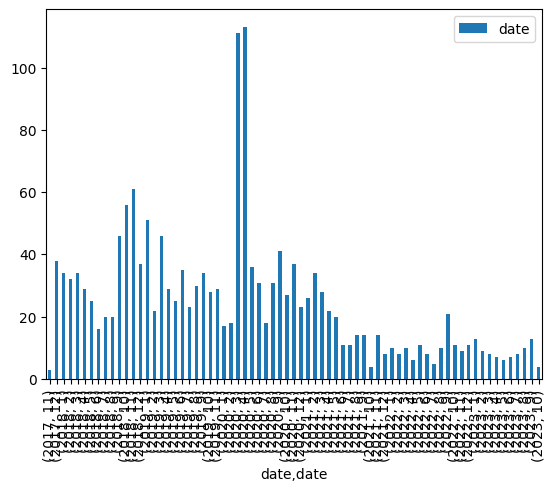

In [113]:
popup.drop(columns=["source"]).groupby([popup["date"].dt.year, popup["date"].dt.month]).count().plot(kind="bar")

<Axes: xlabel='date,date'>

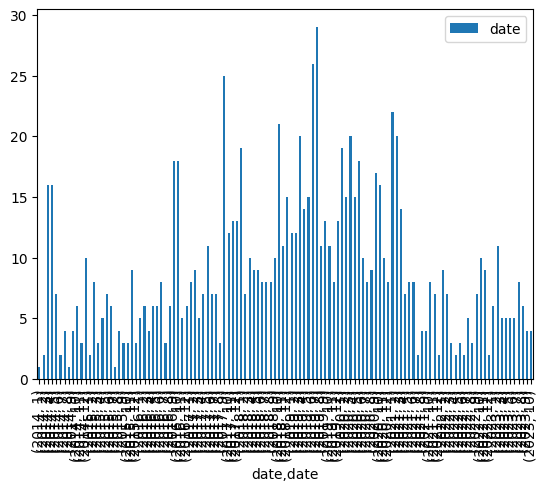

In [101]:
hosted.drop(columns=["source"]).groupby([hosted["date"].dt.year, hosted["date"].dt.month]).count().plot(kind="bar")

<Axes: xlabel='date,date'>

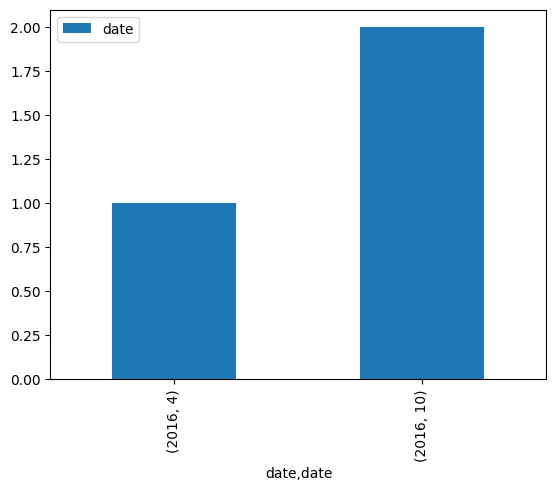

In [114]:
admin.drop(columns=["source"]).groupby([admin["date"].dt.year, admin["date"].dt.month]).count().plot(kind="bar")

<Axes: xlabel='date,date'>

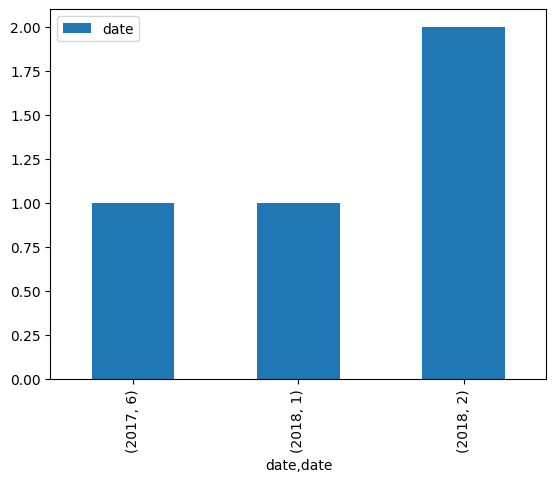

In [115]:
imported.drop(columns=["source"]).groupby([imported["date"].dt.year, imported["date"].dt.month]).count().plot(kind="bar")


In [154]:
data = [{"source": sub["source"], "status": sub["status"]} for sub in members]
df=pd.DataFrame(data)
#df = df.dropna(subset=['date'])
df.groupby("source").value_counts()

source                status      
                      unsubscribed       2
API - Generic         subscribed      3665
                      cleaned          138
                      unsubscribed     136
Admin Add             subscribed       409
                      unsubscribed     326
                      cleaned          197
Facebook Signup Form  subscribed         2
Hosted Signup Form    subscribed       801
                      unsubscribed     208
                      cleaned           37
                      pending            2
Import                subscribed       407
                      unsubscribed     298
                      cleaned          132
Popup Form            subscribed      1562
                      unsubscribed     119
                      cleaned           23
                      pending           13
Unknown               unsubscribed    2559
                      subscribed      1320
                      cleaned          841
Zapier             